## Business Understanding
The real estate market requires accurate pricing predictions to help sellers set competitive prices
and buyers make informed decisions. This dataset contains detailed features of residential homes
in Ames, Iowa, including physical characteristics, location details, and sale prices.
The goal of this project is to analyze various factors influencing house prices in these locations and develop predictive models to estimate house prices based on these factors.

## Problem Statement
To develop a predictive model to accurately estimate house sale prices based on various property
features, enabling stakeholders to make data-driven pricing decisions and identify key factors
influencing property values

## Objectives

1. Build an accurate predictive model for house prices.
2. Identify key features influencing house prices.
3. Provide actionable insights for real estate stakeholders.
4. Compare different machine learning models for optimal performance.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np

# Loading the ames dataset
df = pd.read_csv('ames.csv')

# Basic data understanding
print("Dataset Shape:", df.shape)
print("\nFirst few rows:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (1460, 81)

First few rows:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sale

**Dataset Overview:**

**Size and Structure**:The dataset contains 1460 rows and 81 columns.
The dataset includes a mix of numerical (int64, float64) and categorical (object) data types.

**Target Variable**:The primary target variable is "SalePrice," which indicates the price of the house.

**Missing Values**:A significant number of columns have missing values. Notably:"Alley," "PoolQC," "Fence," and "MiscFeature" have a very high percentage.
This indicates that data cleaning and imputation will be crucial steps.

**Data Types**:The dataset has 35 integer columns, 3 float columns, and 43 object (categorical) columns. This highlights the need for appropriate handling of both numerical and categorical features.


**Key Statistical Insights:**

***SalePrice Distribution:***
- The average sale price is approximately $180,921.

- The minimum sale price is $34,900.

- The maximum is $755,000, indicating a wide range of property values.
- The standard deviation of sale price is quite high, meaning that the sale prices are spread out.

***Overall Quality and Condition:***

- The "OverallQual" (overall quality) and "OverallCond" (overall condition) columns have a range from 1 to 10 and 1 to 9, respectively, providing a numerical assessment of property quality.
- The mean of OverallQual is 6.09, and the mean of OverallCond is 5.57.

***Year Built and Remodeled:***
The "YearBuilt" and "YearRemodAdd" columns show a range of construction and remodeling years, providing a timeline for property development.

***Lot Area and Lot Frontage:***
"LotArea" and "LotFrontage" provide information about the size and dimensions of the property. The large standard deviation of lot area shows that there is a large variety of lot sizes.

***Basement and Garage Features:***
Columns related to basement and garage features (e.g., "BsmtFinSF1," "GarageCars," "GarageArea") provide insights into the property's infrastructure.

***Porch and Deck Areas:***
"WoodDeckSF," "OpenPorchSF," and other porch-related columns indicate the presence and size of outdoor living spaces.

***Pool and Miscellaneous Features:***
The "PoolArea" and "MiscVal" columns indicate that pools and other miscellaneous features are relatively rare.

## Data Cleaning

### Correct Formats

In [2]:
# Converting the numerical columns into the right format

numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','GarageArea', 'SalePrice']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

### Handling NAs

In [3]:
# Replacing the 'NA' strings with np.nan
df.replace('NA', np.nan, inplace=True)

### Handling Duplicates

In [4]:
df.drop_duplicates(inplace=True)

### Other cleaning steps

In [5]:
# Missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)


Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
# Filling the missing values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [7]:
# Droping columns with too many missing values (if over 50% are missing)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

### Feature Engineering

In [8]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

## EDA

### Univariate Analysis

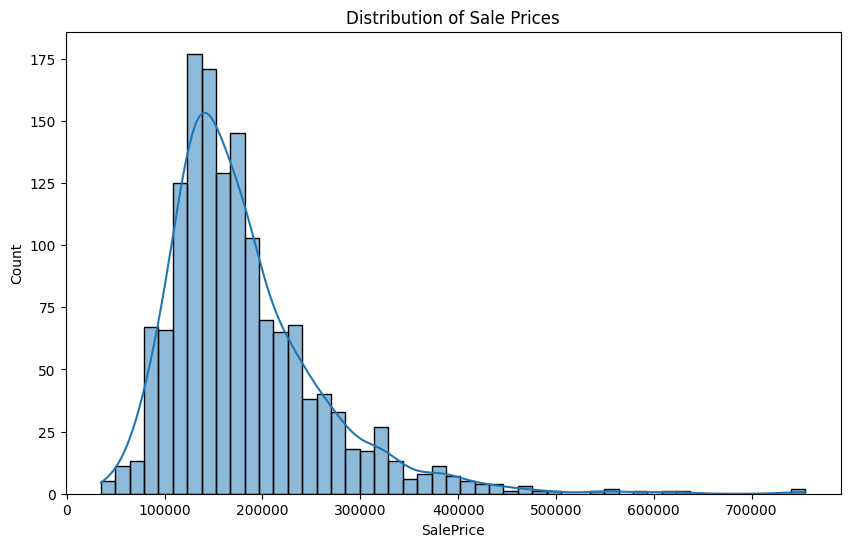

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

The histogram provides a visual representation of the distribution of sale prices, highlighting its right-skewed nature, the central tendency, spread, and potential outliers.
The distribution of sale prices is right-skewed. This means that the tail of the distribution extends further to the right (higher prices), indicating that there are more houses with lower sale prices and fewer houses with very high sale prices.

### Bivariate Analysis

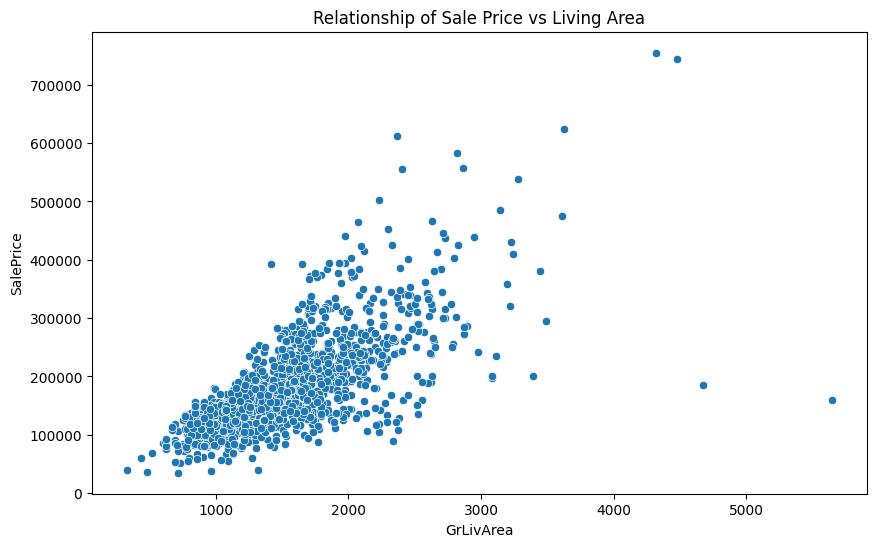

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Relationship of Sale Price vs Living Area')
plt.show()

The scatter plot reveals a positive correlation between living area and sale price. This means that, in general, houses with larger living areas tend to have higher sale prices.

The correlation appears to be moderately strong, but not perfect. While there's a clear trend, there's also some scatter, indicating that other factors besides living area also influence sale price.

### Multivariate Analysis

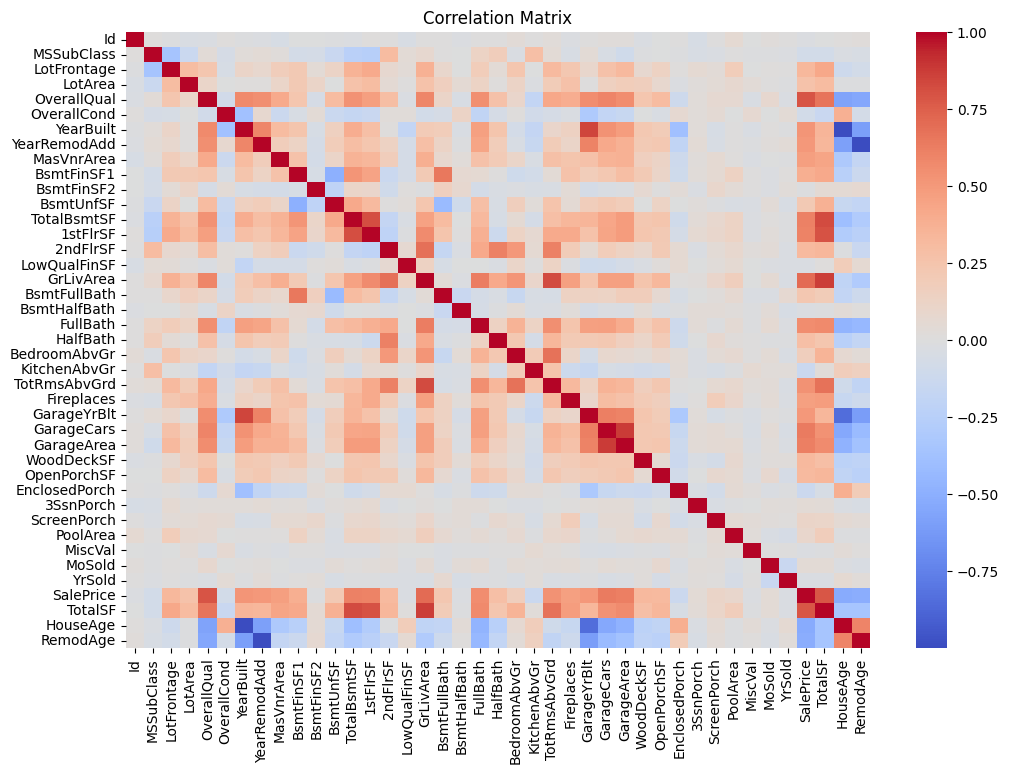

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap above provides a visual overview of the relationships between numerical features in the dataset.

Some of the Key Observations are as below;

**Strong Positive Correlations:** You can identify strong positive correlations (dark red areas)
- "OverallQual" and "SalePrice" (as expected, higher quality houses sell for more).
- "GarageCars" and "GarageArea" (more garage space correlates with more cars).
- "GrLivArea" and "SalePrice" (larger living area correlates with higher price).
- "TotalBsmtSF" and "1stFlrSF" (a larger total basement square footage correlates with a larger 1st floor square footage).


## Preprocessing

### Encoding

In [12]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


### Scaling

In [13]:
#Performing Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(876, 78) (584, 78)
(876,) (584,)


This implies that 20% of our data is in test and 80% trains the model

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)


Scaling, standardizes feature values so that some values are not penalized unfairly

## Modeling

### Regression

In [15]:
# fitting a ridge regression model

# Import a ridge model from sckit-learn
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=100, solver = "sag", random_state=1)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=100, random_state=1, solver='sag')

### Classification

#### Logistic Regression

In [16]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the random forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # You can adjust hyperparameters
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### K-NN Model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the K-NN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

#### SVM

In [20]:
from sklearn.svm import SVR

# Initialize and train the SVM model
svm_model = SVR(kernel='linear') # You can change the kernel (e.g., 'rbf', 'poly')
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

#### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'K-NN': KNeighborsRegressor(),
    'SVM': SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")

Model Performance:
Linear Regression: RMSE = 36658.46, R2 = 0.81
Decision Tree: RMSE = 38703.79, R2 = 0.79
Random Forest: RMSE = 28328.87, R2 = 0.89
K-NN: RMSE = 40809.63, R2 = 0.77
SVM: RMSE = 86886.76, R2 = -0.04


From the above trained models below are the observations;

- Linear Regression (RMSE: 36,658.46, R²: 0.81)

Performs well, explaining 81% of variance.Moderate RMSE, meaning prediction errors are relatively low.

- Decision Tree (RMSE: 38,703.79, R²: 0.79)

Slightly worse than Linear Regression.
More prone to overfitting, causing minor performance drop.

- Random Forest (RMSE: 28,328.87, R²: 0.89)

Lowest RMSE and highest R², meaning it provides the **most accurate predictions.**
Likely benefits from ensemble averaging, reducing overfitting.

- K-NN (RMSE: 40,809.63, R²: 0.77)

Weaker performance, higher error.
May struggle with high-dimensional data or inappropriate K-value.

- SVM (RMSE: 86,886.76, R²: -0.04)

Negative R² means it performs worse than a simple mean predictor.
Very high RMSE suggests it fails to capture the underlying pattern.

### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


### Model Evaluation

In [26]:
# Evaluate the best model
y_pred_best = best_rf.predict(X_test_scaled)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest - RMSE: {rmse_best:.2f}, R2: {r2_best:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))

Best Random Forest - RMSE: 28165.18, R2: 0.89

Top 10 Important Features:
          Feature  Importance
75       TotalSF    0.463225
16   OverallQual    0.273074
18     YearBuilt    0.020723
44     GrLivArea    0.015307
76      HouseAge    0.015257
4        LotArea    0.012187
42      2ndFlrSF    0.011571
32    BsmtFinSF1    0.011516
11  Neighborhood    0.011515
19  YearRemodAdd    0.009831


With an RMSE of 28165.18 and R-Squared of 0.89, Random Forest model is definitely.

### Conclusion and Recommendation

From my objectives stated above;

**Below is my Conclusion:**
The Random Forest model with tuned hyperparameters provided the best performance for predicting house prices.
Key features influencing prices include TotalSF, GrLivArea, and OverallQual.

**Below are my Recommendations:**
1. Focus on property size and quality for pricing decisions.
2. Use the model for initial price estimates.
3. Future improvements could include using advanced ensemble methods and feature selection techniques.
